In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

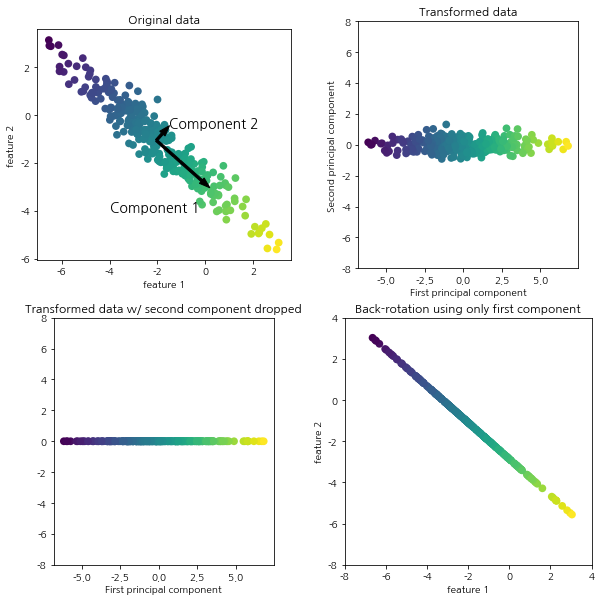

In [2]:
mglearn.plots.plot_pca_illustration()

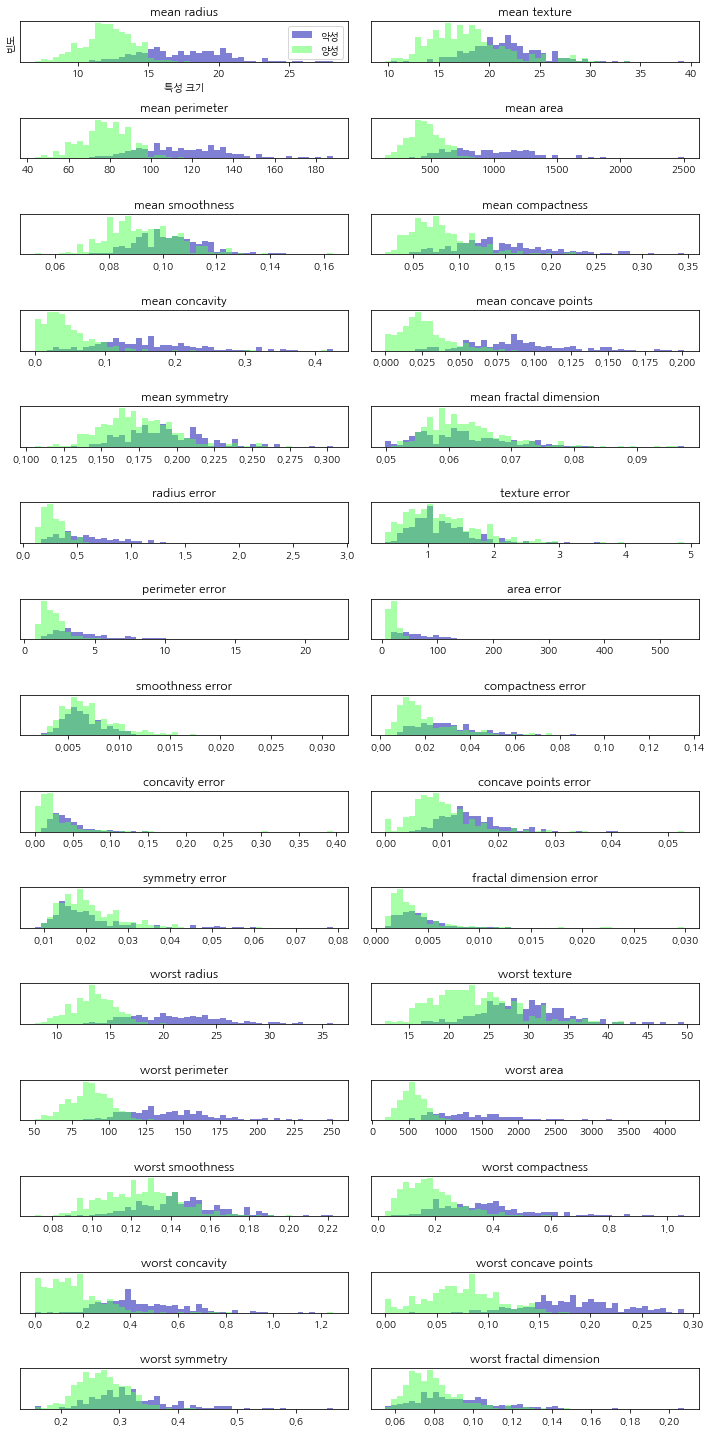

In [3]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc='best')
fig.tight_layout()

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

In [5]:
pca = PCA(n_components=2)

pca.fit(x_scaled)

x_pca = pca.transform(x_scaled)
print('원본 데이터 형태 : {}'.format(str(x_scaled.shape)))
print('축소된 데이터 형태 : {}'.format(str(x_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


Text(0, 0.5, '두 번째 주성분')

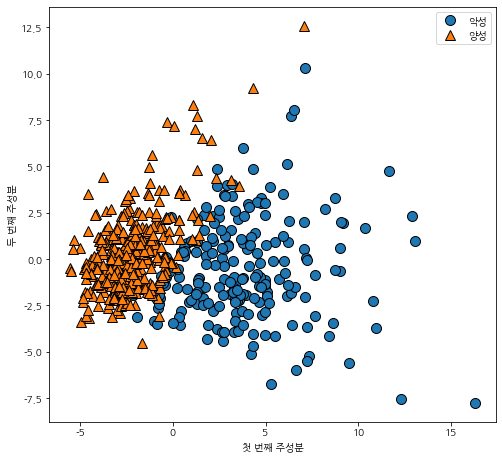

In [6]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

In [7]:
print('pca 주성분 : \n{}'.format(pca.components_))

pca 주성분 : 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

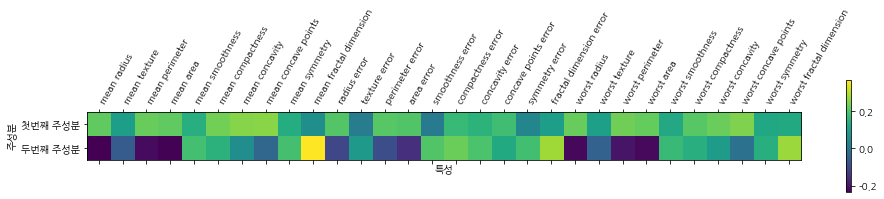

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['첫번째 주성분', '두번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')